In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from logistic_regression import *

In [2]:
X = pd.read_csv("data/X_train.csv")
y = pd.read_csv("data/y_train.csv")
y = y["is_late"].values

In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# hyperparameters
initial_w  = np.zeros(X_scaled.shape[1])
initial_b  = 0.0
iterations = 10000
alpha      = 0.01
lambda_    = 0.5

w,b, J_history = gradient_descent(X_scaled, y, initial_w, initial_b, alpha, iterations, lambda_, compute_cost, compute_gradient)

In [5]:
def predict(X, w, b):
    z = X @ w + b
    f_wb = sigmoid(z)
    p = (f_wb >= 0.35).astype(int)
    return p

In [6]:
y_pred = predict(X_scaled, w,b)
print('Train Accuracy: %f'%(np.mean(y_pred == y) * 100))

# get feature names from your X matrix
feature_cols = X.columns.tolist()

for name, weight in zip(feature_cols, w):
    print(f"{name:30s}  {weight: .6f}")

Train Accuracy: 92.280000
distance_km                      0.109989
receipt_hour                    -0.746104
from_city_name_杭州市               0.019504
from_city_name_重庆市               0.089325
typecode_203ac3454d75e02ebb0a3c6f51d735e4  -0.024765
typecode_339d14e62a5bbd67de62f461a5f7db1e   0.020197
typecode_37b081598a86e85e8887b0539ab61824  -0.009617
typecode_4602b38053ece07a9ca5153f1df2e404  -0.229977
typecode_592363aed428fd9addffa38da2724834   0.007835
typecode_6771c4e2ecb275c95c43f6c639a2cbad  -0.000029
typecode_73ffcbd1b26557b462b14e4dd4c57fcb   0.007423
typecode_7a0cb6a50445e24c12a407687b28fa06   0.057982
typecode_84c7d46d654e5a8bd329a3e8ed0293ce  -0.000060
typecode_90b3cbb280f865d62b2fd2efdd0fb0f3   0.013249
typecode_e83a6cefa7e4bde8a8af866f3f4e90eb   0.002586
typecode_e8b508bbdada69046e4dd74ef59ee85a   0.018523
typecode_fe76dff35bb199cdb7329eba2b918f18   0.040571
rider_late                       0.435255
aoi_late                         2.650589
dipan_late                      -

In [7]:
print(np.mean(y))

0.2488


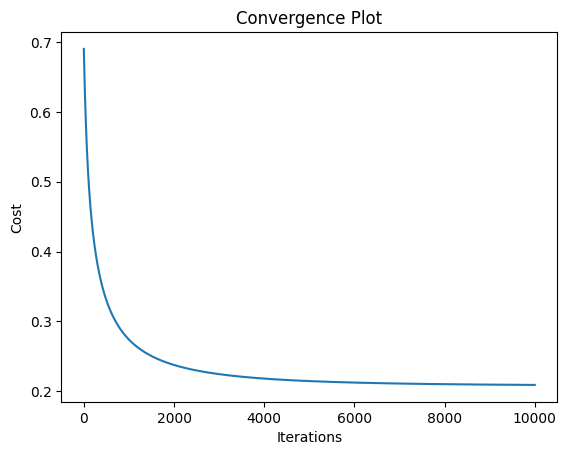

Final cost: 0.20916311668320192


In [8]:
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Plot')
plt.show()
print('Final cost:', J_history[-1])

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report,
)

z = X_scaled @ w + b
y_prob = sigmoid(z)
y_pred = (y_prob >= 0.35).astype(int) 

# --- All metrics ---
print("CLASSIFICATION REPORT")
print(classification_report(y, y_pred, target_names=["On Time", "Late"]))

print(f"\nAccuracy : {accuracy_score(y, y_pred):.4f} ({accuracy_score(y, y_pred):.2%})")
print(f"Precision: {precision_score(y, y_pred):.4f}")
print(f"Recall   : {recall_score(y, y_pred):.4f}" f" ({recall_score(y, y_pred):.2%} late deliveries caught)")
print(f"F1 Score : {f1_score(y, y_pred):.4f}")
print(f"ROC AUC  : {roc_auc_score(y, y_prob):.4f}")

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     On Time       0.96      0.94      0.95      7512
        Late       0.82      0.89      0.85      2488

    accuracy                           0.92     10000
   macro avg       0.89      0.91      0.90     10000
weighted avg       0.93      0.92      0.92     10000


Accuracy : 0.9228 (92.28%)
Precision: 0.8190
Recall   : 0.8855 (88.55% late deliveries caught)
F1 Score : 0.8509
ROC AUC  : 0.9650


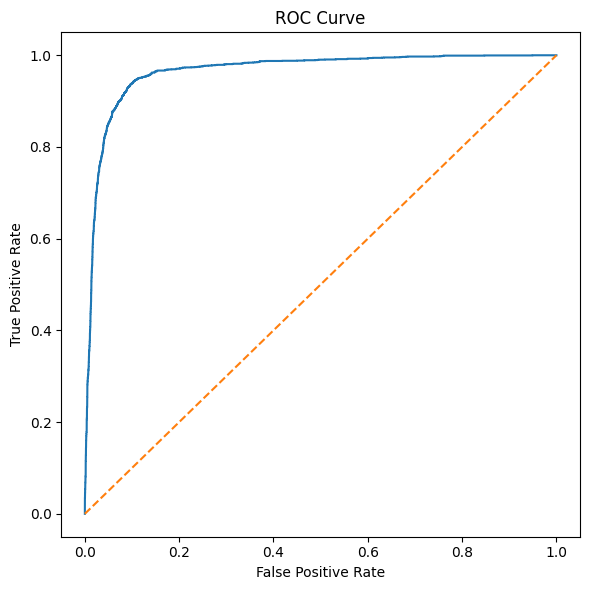

In [10]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y, y_prob)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.tight_layout()
plt.show()

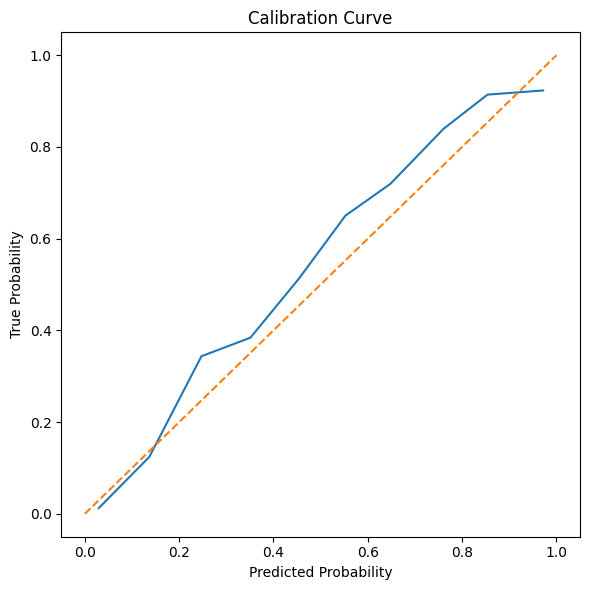

In [11]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y, y_prob, n_bins=10)

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true)
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.tight_layout()
plt.show()

### SKlearn Comparison

In [12]:
import sklearn.linear_model as skl_lr

skl_model = skl_lr.LogisticRegression(max_iter=10000, C=1/lambda_)
skl_model.fit(X_scaled, y)
skl_p = skl_model.predict(X_scaled)

In [13]:
# Predictions
skl_prob = skl_model.predict_proba(X_scaled)[:, 1]
skl_pred = skl_model.predict(X_scaled)

# --- All metrics ---
print("CLASSIFICATION REPORT")
print(classification_report(y, skl_pred, target_names=["On Time", "Late"], digits=4))

print(f"Accuracy  : {accuracy_score(y, skl_pred):.4f} ({accuracy_score(y, skl_pred):.2%})")
print(f"Precision : {precision_score(y, skl_pred):.4f}")
print(f"Recall    : {recall_score(y, skl_pred):.4f}  ({recall_score(y, skl_pred):.2%} late deliveries caught)")
print(f"F1 Score  : {f1_score(y, skl_pred):.4f}")
print(f"ROC AUC   : {roc_auc_score(y, skl_prob):.4f}")

CLASSIFICATION REPORT
              precision    recall  f1-score   support

     On Time     0.9436    0.9550    0.9493      7512
        Late     0.8590    0.8276    0.8430      2488

    accuracy                         0.9233     10000
   macro avg     0.9013    0.8913    0.8961     10000
weighted avg     0.9225    0.9233    0.9228     10000

Accuracy  : 0.9233 (92.33%)
Precision : 0.8590
Recall    : 0.8276  (82.76% late deliveries caught)
F1 Score  : 0.8430
ROC AUC   : 0.9649
